In [36]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('user_data.csv')

In [4]:
#DROPPING "Unnamed" COLUMN
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
#PRINTING STATE/UT WITH DUPLICATES
states=df['STATE/UT'].unique()
print("Number of states/territories with duplicates: ", len(states))
states

Number of states/territories with duplicates:  72


array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [6]:
#REPLACING AND REMOVING DUPLICATES
df["STATE/UT"]=df.apply(lambda row:row['STATE/UT'].replace(" ","").lower(),axis=1)
df['STATE/UT'].replace("a&nislands",'andaman and nicobar',inplace=True)
df['STATE/UT'].replace("d&nhaveli",'dadra and nagar haveli',inplace=True)
df['STATE/UT'].replace("delhiut",'delhi',inplace=True)
df['STATE/UT'].replace("jammu&kashmir",'jammu and kashmir',inplace=True)
df['STATE/UT'].replace("daman&diu",'damau and diu',inplace=True)
states=df['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))
states

Number of states/territories without duplicates:  36


array(['andhrapradesh', 'arunachalpradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachalpradesh',
       'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhyapradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamilnadu',
       'tripura', 'uttarpradesh', 'uttarakhand', 'westbengal',
       'andaman and nicobar', 'chandigarh', 'dadra and nagar haveli',
       'damau and diu', 'delhi', 'lakshadweep', 'puducherry', 'telangana'],
      dtype=object)

In [7]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [8]:
#CALCULATING TOTAL CRIME IN A PARTICULAR YEAR
df['totalcrimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']+df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,totalcrimes
0,andhrapradesh,ADILABAD,2001,50,30,16,149,34,175,0,454
1,andhrapradesh,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,andhrapradesh,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,andhrapradesh,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,andhrapradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0,475
...,...,...,...,...,...,...,...,...,...,...,...
10672,lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0,4
10673,lakshadweep,Total District(s),2014,1,0,0,1,2,0,0,4
10674,puducherry,Karaikal,2014,3,1,0,12,1,1,0,18
10675,puducherry,Puducherry,2014,7,6,1,20,7,3,0,44


In [9]:
#TOTAL_CRIMES
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','totalcrimes']
crimes

['Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls',
 'totalcrimes']

In [10]:
df1=pd.DataFrame()
for i in crimes:
    df_crimes=df.groupby(['Year'])[i].sum()
    df1[i]=df_crimes
df1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,totalcrimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


In [11]:
df2=df1.drop(columns=['totalcrimes'])

In [12]:
def crimes_by_different_order(dataframe,column_name):
    "This function returns a dataframe with total number of particular crimes grouping by certain column"
    for column in list(df2.columns)[:]:
        dataframe[column]=df2.groupby([column_name])[column].sum()   
    return dataframe

In [13]:
#creating a new empty dataframe
total_crimes_in_years_df=pd.DataFrame()
total_crimes_in_years_df=crimes_by_different_order(total_crimes_in_years_df,"Year")
total_crimes_in_years_df.reset_index(inplace=True)
total_crimes_in_years_df

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,2001,32150,29290,13702,68248,19492,98340,228
1,2002,32746,29012,13644,67886,20310,98474,152
2,2003,31694,26592,12416,65878,24650,101406,92
3,2004,36466,31156,14052,69134,20002,116242,178
4,2005,36718,31500,13574,68350,19968,116638,298
5,2006,38696,34828,15236,73234,19932,126256,134
6,2007,41474,40832,16186,77468,21900,151860,122
7,2008,42934,45878,16344,80826,24428,162688,134
8,2009,42794,51482,16766,77422,22018,179092,96
9,2010,44344,59590,16782,81226,19922,188082,72


In [14]:
total_crimes_in_years_df['Total Number of Cases']=total_crimes_in_years_df.sum(axis=1)
total_crimes_in_years_df["Total Number of Cases"].sum()

5349715

In [15]:
crimes_in_years_df=total_crimes_in_years_df.drop("Total Number of Cases", axis=1)
crimes_in_years_df.set_index("Year", inplace = True) 

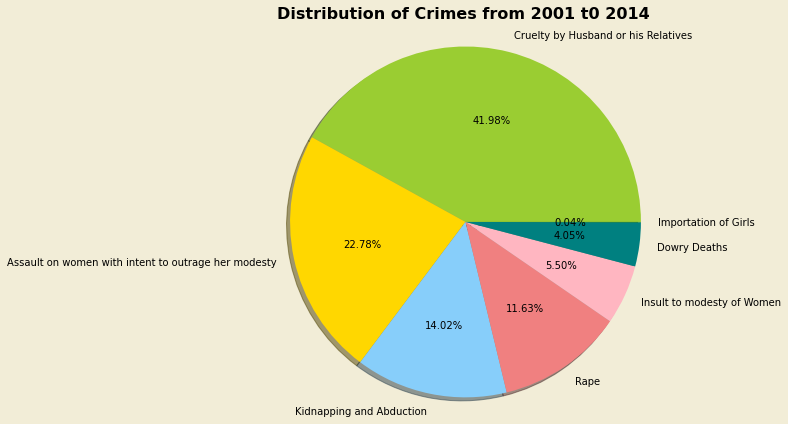

In [16]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_top_crimes=pd.DataFrame(columns=['crimes',"total"])
for i in crimes:
    df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
    
df_top_crimes=df_top_crimes.sort_values(by='total',ascending=False)

df_top_crimes

list_crimes_number=list(df_top_crimes['total'])
list_crimes=list(df_top_crimes['crimes'])
fig=plt.figure(figsize=(10,6))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','lightpink','teal','green']
#patches,text=plt.pie(list_crimes_number,colors=colors,labels=list_crimes_number,autopct='%1.1f%%')
plt.pie(list_crimes_number,colors=colors,labels=list_crimes,autopct='%1.2f%%',shadow=True)
#plt.legend()
plt.title("Distribution of Crimes from 2001 t0 2014",fontweight='bold',fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
pd.DataFrame(crimes_in_years_df.sum(axis=0),columns=['Count']).sort_values(by='Count',ascending=False)

,Count
Cruelty by Husband or his Relatives,2233888
Assault on women with intent to outrage her modesty,1212258
Kidnapping and Abduction,746198
Rape,619158
Insult to modesty of Women,292756
Dowry Deaths,215480
Importation of Girls,1872


In [18]:
df01=df.drop(columns=['Year'])
df01

,STATE/UT,DISTRICT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,totalcrimes
0,andhrapradesh,ADILABAD,50,30,16,149,34,175,0,454
1,andhrapradesh,ANANTAPUR,23,30,7,118,24,154,0,356
2,andhrapradesh,CHITTOOR,27,34,14,112,83,186,0,456
3,andhrapradesh,CUDDAPAH,20,20,17,126,38,57,0,278
4,andhrapradesh,EAST GODAVARI,23,26,12,109,58,247,0,475
...,...,...,...,...,...,...,...,...,...,...
10672,lakshadweep,Lakshadweep,1,0,0,1,2,0,0,4
10673,lakshadweep,Total District(s),1,0,0,1,2,0,0,4
10674,puducherry,Karaikal,3,1,0,12,1,1,0,18
10675,puducherry,Puducherry,7,6,1,20,7,3,0,44


In [19]:
df01=df01.groupby(by=["STATE/UT"]).sum()
df01

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,totalcrimes
STATE/UT,,,,,,,,
andaman and nicobar,336,212,20,600,112,288,0,1568
andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
arunachalpradesh,1316,1470,6,1996,48,476,0,5312
assam,40190,62074,3268,38256,254,115300,22,259364
bihar,30758,57086,32206,16958,694,69770,904,208376
chandigarh,770,1682,90,1088,342,2080,0,6052
chhattisgarh,29308,11808,2758,47096,3968,23436,12,118386
dadra and nagar haveli,132,224,2,106,12,90,0,566
damau and diu,60,44,6,40,4,76,0,230


In [20]:
df12=df01.drop(columns=['Kidnapping and Abduction','Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls','totalcrimes'])
maxr =df12.sort_values('Rape', ascending = False).head(10)
maxr

,Rape
STATE/UT,
madhyapradesh,90996
uttarpradesh,51150
maharashtra,48974
westbengal,47876
rajasthan,45684
assam,40190
andhrapradesh,32150
bihar,30758
odisha,30480


In [21]:
df12=df01.drop(columns=['Rape','Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls', 'totalcrimes'])
maxkA =df12.sort_values('Kidnapping and Abduction', ascending = False).head(10)
maxkA

,Kidnapping and Abduction
STATE/UT,
uttarpradesh,135906
rajasthan,66278
assam,62074
westbengal,61158
bihar,57086
delhi,46586
madhyapradesh,35608
gujarat,34670
andhrapradesh,34504


In [22]:
df12=df01.drop(columns=[ 'totalcrimes','Rape','Kidnapping and Abduction', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls'])
maxdd =df12.sort_values('Dowry Deaths', ascending = False).head(10)
maxdd

,Dowry Deaths
STATE/UT,
uttarpradesh,57256
bihar,32206
madhyapradesh,21090
andhrapradesh,13844
westbengal,12308
rajasthan,11854
odisha,10782
maharashtra,9696
jharkhand,7896


In [23]:
df12=df01.drop(columns=['totalcrimes','Rape','Dowry Deaths', 'Kidnapping and Abduction', 'Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls'])
maxaow =df12.sort_values('Assault on women with intent to outrage her modesty', ascending = False).head(10)
maxaow

,Assault on women with intent to outrage her modesty
STATE/UT,
madhyapradesh,195478
andhrapradesh,126952
maharashtra,114704
uttarpradesh,91212
rajasthan,83362
kerala,80438
odisha,80214
westbengal,66908
karnataka,65750


In [24]:
df12=df01.drop(columns=['totalcrimes','Rape','Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Kidnapping and Abduction','Cruelty by Husband or his Relatives','Importation of Girls'])
maxitm =df12.sort_values('Insult to modesty of Women', ascending = False).head(10)
maxitm

,Insult to modesty of Women
STATE/UT,
andhrapradesh,86964
uttarpradesh,53130
maharashtra,32634
tamilnadu,21170
madhyapradesh,20964
haryana,17866
jammu and kashmir,9168
kerala,7930
delhi,7928


In [25]:
df12=df01.drop(columns=['totalcrimes','Rape','Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Kidnapping and Abduction','Importation of Girls'])
maxcbh =df12.sort_values('Cruelty by Husband or his Relatives', ascending = False).head(10)
maxcbh

,Cruelty by Husband or his Relatives
STATE/UT,
westbengal,344124
andhrapradesh,280906
rajasthan,262200
uttarpradesh,193738
maharashtra,193202
gujarat,146468
assam,115300
kerala,111626
madhyapradesh,102816


In [26]:
df12=df01.drop(columns=[ 'totalcrimes','Rape','Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Cruelty by Husband or his Relatives','Kidnapping and Abduction'])
maxiog =df12.sort_values('Importation of Girls', ascending = False).head(10)
maxiog

,Importation of Girls
STATE/UT,
bihar,904
jharkhand,298
westbengal,254
madhyapradesh,134
karnataka,94
odisha,36
andhrapradesh,34
tamilnadu,30
assam,22


In [27]:
df['highCrime'] = np.where(df['totalcrimes']>2, 1, 0)

In [28]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.9556991664325185
negative instance percentage is  0.04430083356748149


In [29]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


df['highCrime'] = np.where(df['totalcrimes']>2, 1, 0)
initial=pd.read_csv('user_data.csv')
Y = df['highCrime']
fold=df['Year']
state=df['STATE/UT']
year=df['Year']
initial = initial.drop('DISTRICT', 1)
initial = initial.drop('STATE/UT', 1)
initial = initial.drop('Year', 1)

In [30]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_

array([[ 9.99967946e-01, -4.16849899e-04,  7.23053682e-04,
         4.70434412e-04, -3.84809904e-03, -5.39458494e-04,
         6.93468188e-03, -3.97221907e-06],
       [-4.68346229e-03,  1.76721533e-01,  2.41623446e-01,
         6.28565776e-02,  3.72714792e-01,  9.59580494e-02,
         8.70798696e-01,  3.05714990e-04],
       [ 6.38553664e-03,  2.97832894e-01,  1.34416807e-01,
         8.06575280e-02,  8.13669528e-01,  1.01417550e-01,
        -4.62966085e-01,  2.49009942e-04],
       [-8.10621030e-04,  1.05310589e-01,  8.94144699e-01,
         1.97967891e-01, -2.57731287e-01, -2.50017927e-01,
        -1.45904095e-01,  7.79897736e-04],
       [ 1.26075132e-04, -1.78087377e-01,  1.74391104e-01,
         2.38036241e-01, -1.42566635e-01,  9.25167760e-01,
        -7.03572762e-02, -7.65130387e-04]])

In [31]:
pca.explained_variance_ratio_

array([0.86753936, 0.11528358, 0.00998149, 0.00451489, 0.00188914])

In [32]:
pcdf = pca.transform(initial)
pcdf

array([[-3.87185092e+03, -9.13474709e+00,  1.25647703e+01,
        -3.99881669e+01, -3.57600573e+00],
       [-3.87086487e+03, -4.52771328e+01, -1.27118931e+01,
        -3.10602394e+01, -4.26445577e+00],
       [-3.86964722e+03, -1.18776459e+01, -2.41252025e+01,
        -4.35510546e+01,  5.05760037e+01],
       ...,
       [-3.03854820e+03, -2.35106967e+02, -3.55598517e+01,
        -5.76441474e+00, -2.72341530e+00],
       [-3.03756596e+03, -2.27834727e+02, -2.74174637e+01,
        -4.52905766e+00,  1.94411196e+00],
       [-3.03660630e+03, -2.21628288e+02, -1.69806769e+01,
        -6.80848928e+00,  7.28377878e-01]])

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 98.22548495308475
Accuracy is 96.58143673316475
Precision is 97.46261456825856
Recall is 99.00039200313603


In [34]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 88.59435604744303
Cross validation precision is 95.8029674711255
Cross validation recall is 92.06329818901118


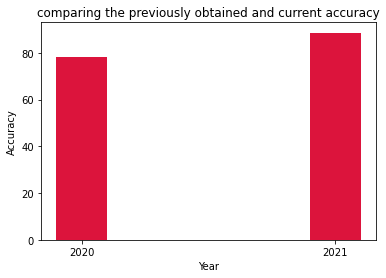

In [35]:
x= ["2020","2021"]
h=[78.00,88.59]
plt.bar(x,h,width= 0.2, color="crimson")
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("comparing the previously obtained and current accuracy")
plt.show()